<a href="https://colab.research.google.com/github/abuwildanm/Leaf-Classification/blob/master/Projek.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projek JST
# Leaf Classification with Learning Vector Quantization


---



## Nama Anggota Kelompok
1. Abu Wildan Mucholladin
2. Avisena Abdillah Alwi
3. Ghaly Rizqi Mauludin
4. Febriana Ranta Lidya

## Prepare the Data

In [0]:
# Import Library Standard
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import Library Sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

In [0]:
# Read Dataset
dataset = pd.read_csv('swedish-leaf.csv')
dataset.head()

,roundness,perimeter_ratio_to_diameter,compactness,eccentricity,aspect_ratio,rectangularity,narrow_factor,perimeter_ratio_major_minor,hu_1,hu_2,...,skewness_G,skewness_B,kurtosis_R,kurtosis_G,kurtosis_B,contrast,correlation,energy,homogeneity,class
0,0.36884,3.5331,5.8370,0.82170,1.7546,0.77832,1.1003,2.4763,0.18666,0.009050,...,-0.519140,1.49320,4.2487,4.5371,4.4354,0.13121,0.98877,0.23375,0.93751,1
1,0.38151,3.4243,5.7392,0.82174,1.7548,0.77691,1.1152,2.4325,0.18701,0.009087,...,-0.001791,0.53622,3.6658,3.7257,2.3236,0.13221,0.98827,0.23445,0.93722,1
2,0.40996,3.4313,5.5365,0.79911,1.6634,0.77352,1.1003,2.3579,0.18297,0.007366,...,-0.199190,0.84646,3.3483,3.4704,2.6509,0.13279,0.98817,0.22993,0.93672,1
3,0.39323,3.4399,5.6530,0.82015,1.7478,0.77444,1.0939,2.3935,0.18723,0.009002,...,-0.227690,0.78302,3.6617,3.8209,2.5256,0.12910,0.98867,0.23076,0.93856,1
4,0.47409,3.3010,5.1485,0.77141,1.5715,0.78131,1.0997,2.2185,0.17661,0.005596,...,-0.231780,0.69847,4.5870,4.9923,2.7346,0.12452,0.98688,0.26982,0.94075,1


In [0]:
# Ukuran Dataset
print('Ukuran dataset:', dataset.shape)

Ukuran dataset: (975, 32)


In [0]:
data = dataset.iloc[:, :-1]
label = dataset['class']

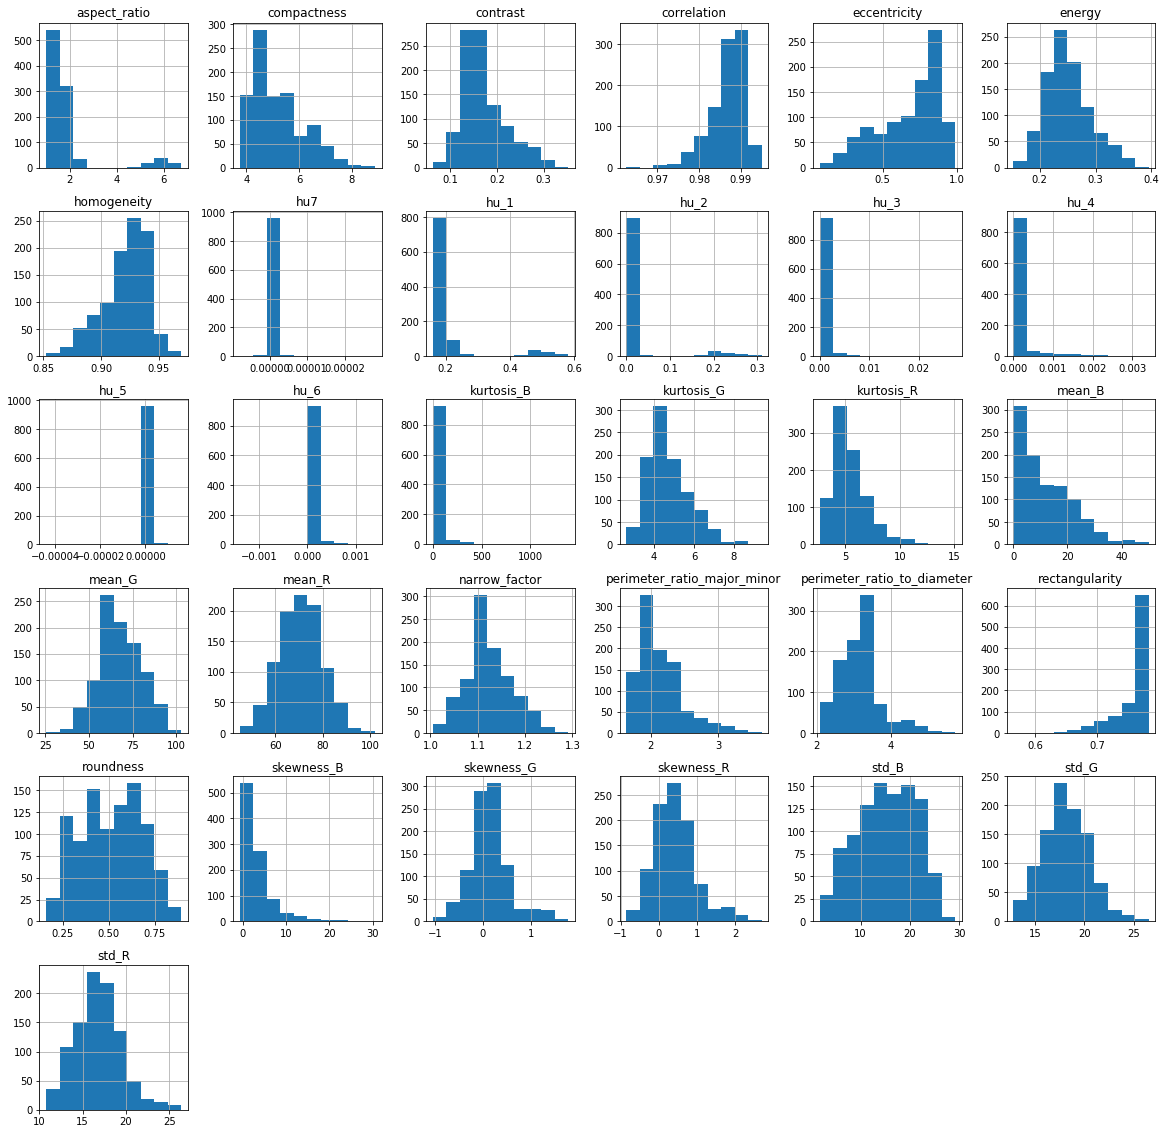

In [0]:
data.hist(figsize=(20,20));

Setelah dilihat histogram masing-masing fitur, terlihat bahwa terdapat beberapa fitur yang distribusinya masih belum mendekati distribusi normal

### Check Skewness

In [0]:
# Check Skewness
print('Skewness:')
for column in data:
  print(column, ':', data[column].skew())

Skewness:
roundness : -0.01763487371266934
perimeter_ratio_to_diameter : 0.7740462725199914
compactness : 0.8622724665987933
eccentricity : -0.6651077891043039
aspect_ratio : 2.81596754776404
rectangularity : -1.9934744684694414
narrow_factor : 0.3722701506064889
perimeter_ratio_major_minor : 1.354135362190747
hu_1 : 3.02545204844238
hu_2 : 3.274692290439898
hu_3 : 12.567854970619335
hu_4 : 5.00532608558966
hu_5 : -15.122510807614521
hu_6 : 3.8609810033396834
hu7 : 20.341204463740002
mean_R : 0.020221330207309474
mean_G : 0.153347999617765
mean_B : 0.9273826312410595
std_R : 0.46529068342519797
std_G : 0.24803265184597448
std_B : -0.1838231350801374
skewness_R : 0.7970526367031292
skewness_G : 0.7895108146100074
skewness_B : 2.8637926268066862
kurtosis_R : 1.431315683185697
kurtosis_G : 0.9248361376002053
kurtosis_B : 6.768752434439314
contrast : 0.9314004640576299
correlation : -1.2510091443780396
energy : 0.5666640224067242
homogeneity : -0.7344777424539618


Skewness adalah derajat ketidaksimetrisan suatu distribusi. Jika kurva frekuensi suatu distribusi memiliki ekor yang lebih memanjang ke kanan (dilihat dari meannya) maka dikatakan menceng kanan (positif) dan jika sebaliknya maka menceng kiri (negatif). Secara perhitungan, skewness adalah momen ketiga terhadap mean. Distribusi normal (dan distribusi simetris lainnya, misalnya distribusi t atau Cauchy) memiliki skewness 0 (nol). <br>

![](https://cdn-images-1.medium.com/max/1600/1*nj-Ch3AUFmkd0JUSOW_bTQ.jpeg)

<br>Terlihat beberapa fitur di atas memiliki nilai skewness yang tinggi sehingga fitur tersebut sangat menyimpang jauh dari distribusi normal

### Atribute Correlation

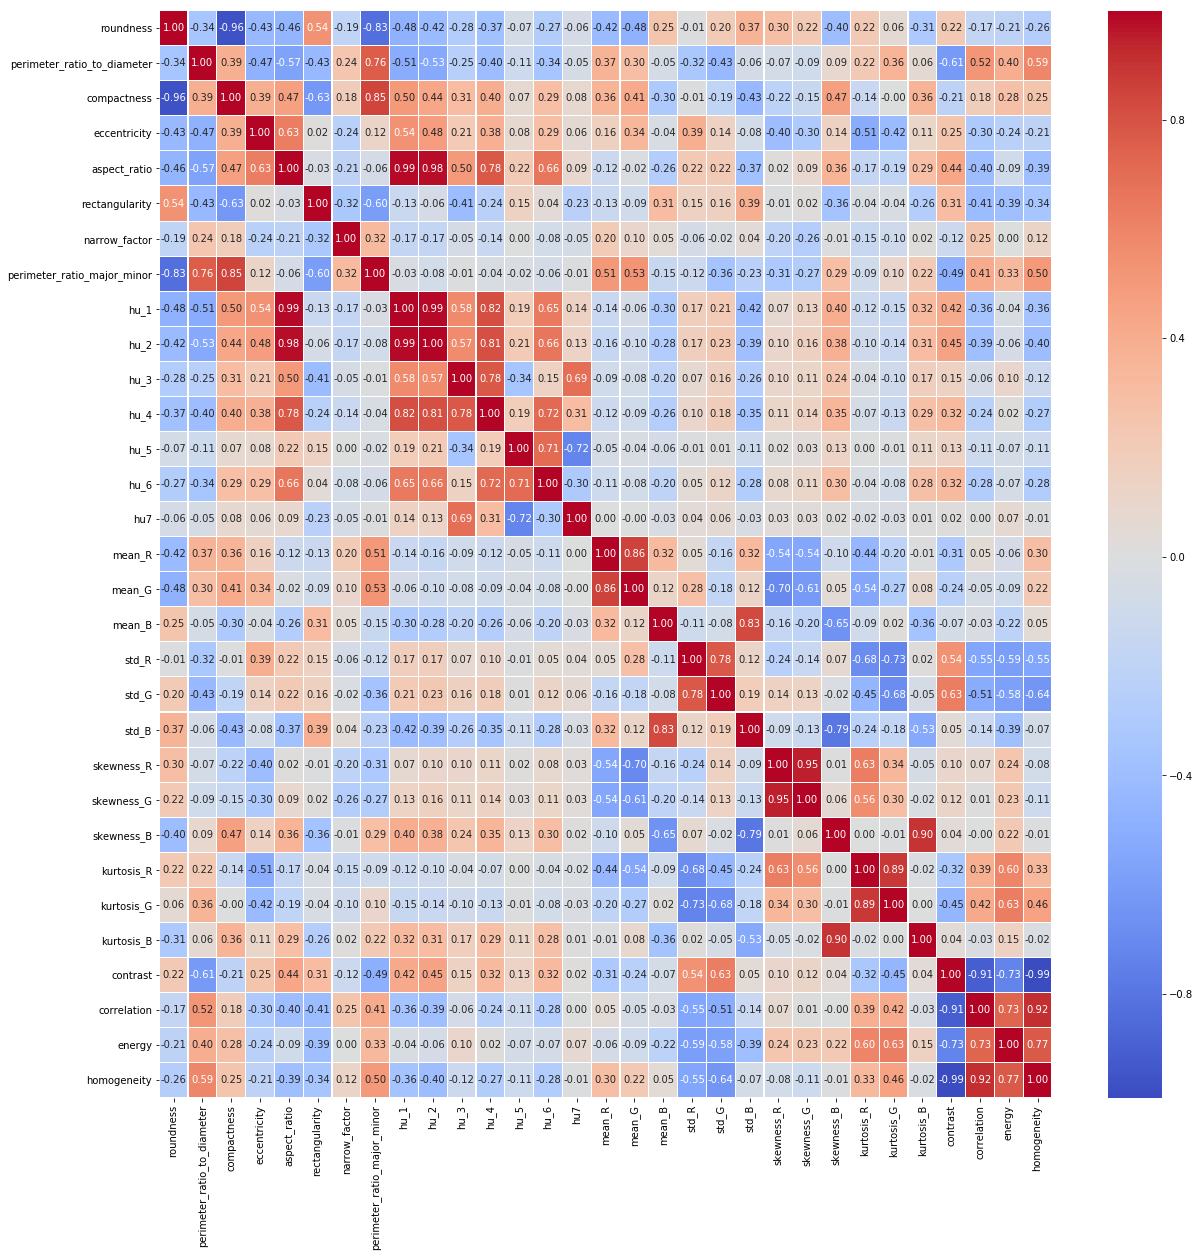

In [0]:
# Uji korelasi atribut
f, ax = plt.subplots(figsize=(20, 20))
corr = data.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm", fmt='.2f', linewidths=.05)

Uji Pearson Product Moment adalah salah satu dari beberapa jenis uji korelasi yang digunakan untuk mengetahui derajat keeratan hubungan 2 variabel yang berskala interval atau rasio, di mana dengan uji ini akan mengembalikan nilai koefisien korelasi yang nilainya berkisar antara -1, 0 dan 1. Nilai -1 artinya terdapat korelasi negatif yang sempurna, 0 artinya tidak ada korelasi dan nilai 1 berarti ada korelasi positif yang sempurna.

Rentang dari koefisien korelasi yang berkisar antara -1, 0 dan 1 tersebut dapat disimpulkan bahwa apabila semakin mendekati nilai 1 atau -1 maka hubungan makin erat, sedangkan jika semakin mendekati 0 maka hubungan semakin lemah. <br><br>

**Koefisien Korelasi Pearson Product Moment**<br>
![](https://i2.wp.com/www.statistikian.com/wp-content/uploads/blogger/-ziyIYtPwW3U/U0jNjkwBZKI/AAAAAAAACik/bREUN-MTd1c/s1600/pearson%2Btabel%2Bkoefisien.JPG?zoom=1.25&resize=400%2C72)
<br><br>
![](https://i0.wp.com/www.smartstat.info/images/stories/statistik/korelasi/korelasi-scatter.png)
<br><br>

Berdasarkan tabel di atas, dapat kami jelaskan tentang nilai koefisien korelasi uji pearson product moment dan makna keeratannya dalam sebuah analisis statistik atau analisis data. Berikut penjelasannya:

1. Nilai koefisien 0 = Tidak ada hubungan sama sekali (jarang terjadi),
2. Nilai koefisien 1 = Hubungan sempurna (jarang terjadi),
3. Nilai koefisien > 0 sd < 0,2 = Hubungan sangat rendah atau sangat lemah,
4. Nilai koefisien 0,2 sd < 0,4 = Hubungan rendah atau lemah,
5. Nilai koefisien 0,4 sd < 0,6 = Hubungan cukup besar atau cukup kuat,
6. Nilai koefisien 0,6 sd < 0,8 = Hubungan besar atau kuat,
7. Nilai koefisien 0,8 sd < 1 = Hubungan sangat besar atau sangat kuat.
8. Nilai negatif berarti menentukan arah hubungan, misal: koefisien korelasi antara penghasilan dan berat badan bernilai -0,5. Artinya semakin tinggi nilai penghasilan seseorang maka semakin rendah berat badannya dengan besarnya keeratan hubungan sebesar 0,5 atau cukup kuat (lihat tabel di atas).

## Preprocessing

### Count Missing Value

In [0]:
print('The number of missing value on dataset:')
dataset.isna().sum()

The number of missing value on dataset:


roundness                      0
perimeter_ratio_to_diameter    0
compactness                    0
eccentricity                   0
aspect_ratio                   0
rectangularity                 0
narrow_factor                  0
perimeter_ratio_major_minor    0
hu_1                           0
hu_2                           0
hu_3                           0
hu_4                           0
hu_5                           0
hu_6                           0
hu7                            0
mean_R                         0
mean_G                         0
mean_B                         0
std_R                          0
std_G                          0
std_B                          0
skewness_R                     0
skewness_G                     0
skewness_B                     0
kurtosis_R                     0
kurtosis_G                     0
kurtosis_B                     0
contrast                       0
correlation                    0
energy                         0
homogeneit

### View Distribution of Value

In [0]:
for column in data:
  print(column, ':')
  print(data[column].value_counts())
  print('\n')

roundness :
0.71574    2
0.80745    2
0.30118    2
0.76394    2
0.65866    2
0.49706    2
0.82114    2
0.39527    2
0.54891    2
0.61181    1
0.59301    1
0.43928    1
0.59103    1
0.28060    1
0.28936    1
0.61436    1
0.67951    1
0.28261    1
0.58665    1
0.31072    1
0.55455    1
0.58644    1
0.41743    1
0.39569    1
0.42245    1
0.62445    1
0.58868    1
0.55588    1
0.29096    1
0.69186    1
          ..
0.22844    1
0.32583    1
0.65433    1
0.73776    1
0.28638    1
0.47833    1
0.40622    1
0.35807    1
0.50217    1
0.58608    1
0.72816    1
0.37294    1
0.39972    1
0.29374    1
0.54375    1
0.27145    1
0.71588    1
0.64857    1
0.41846    1
0.49982    1
0.63514    1
0.28830    1
0.40996    1
0.53808    1
0.29661    1
0.45385    1
0.42974    1
0.27349    1
0.62390    1
0.65946    1
Name: roundness, Length: 966, dtype: int64


perimeter_ratio_to_diameter :
3.3587    4
3.3010    3
3.1055    2
3.2558    2
2.7849    2
2.9996    2
4.6016    2
3.2295    2
3.3027    2
3.4708    2


### Drop Feature

In [0]:
feature_drop = ['hu_4', 'hu_5', 'hu_6', 'hu7']
data = data.drop(columns=feature_drop)
data.columns

Index(['roundness', 'perimeter_ratio_to_diameter', 'compactness',
       'eccentricity', 'aspect_ratio', 'rectangularity', 'narrow_factor',
       'perimeter_ratio_major_minor', 'hu_1', 'hu_2', 'hu_3', 'mean_R',
       'mean_G', 'mean_B', 'std_R', 'std_G', 'std_B', 'skewness_R',
       'skewness_G', 'skewness_B', 'kurtosis_R', 'kurtosis_G', 'kurtosis_B',
       'contrast', 'correlation', 'energy', 'homogeneity'],
      dtype='object')

### Normalization

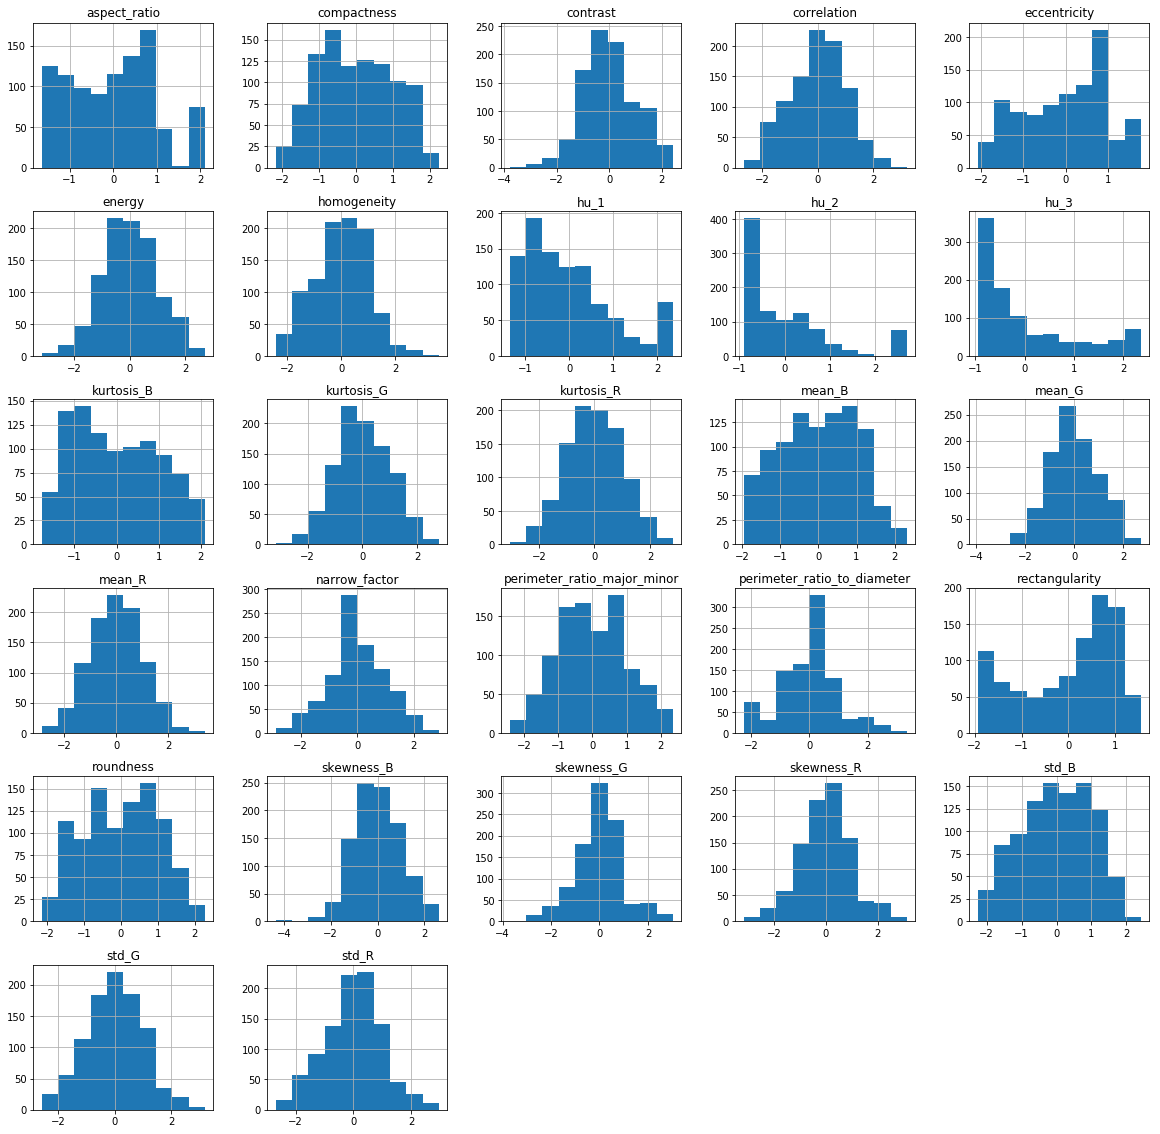

In [0]:
# # Min-Max Normalization
# # Min-Max = (x-min) / (max-min)
# mms = MinMaxScaler()
# result = mms.fit_transform(data)
# data = pd.DataFrame(data=result, columns=data.columns)
# data.hist(figsize=(20,20));

# # Standard Normalization (Z-Score)
# # Z = (x-mean) / (standard deviation)
# ss = StandardScaler()
# result = ss.fit_transform(data)
# data = pd.DataFrame(data=result, columns=data.columns)
# data.hist(figsize=(20,20));

# Power Transform
pt = PowerTransformer()
result = pt.fit_transform(data)
data = pd.DataFrame(data=result, columns=data.columns)
data.hist(figsize=(20,20));

### Split the Dataset

In [0]:
# Pembagian data training & testing
x_train, x_test, y_train, y_test = train_test_split(data, label, stratify=label, test_size=0.3)

In [0]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [0]:
n_input = x_train.shape[1]
n_output = len(np.unique(y_train))
print('Input Neuron:', n_input)
print('Output Neuron:', n_output)

Input Neuron: 27
Output Neuron: 13


## Classification

In [0]:
class LVQ(object):

    def __init__(self, sizeInput, sizeOutput, max_epoch, alpha=np.random.random(), threshold=np.random.random(), version='1'):
        """
        Inisialisasi class (constructor)
        :param sizeInput (int): Banyaknya input neuron sesuai dengan banyaknya parameter (fitur pada data latih)
        :param sizeOutput (int): Banyaknya output neuron sesuai dengan banyaknya label (kelas pada data latih)
        :param max_epoch (int): Maksimal epoch yang diizinkan
        :param alpha (float): learning rate
        :param threshold (float): nilai ambang batas
        :param version (string): versi dari jaringan LVQ. Bisa diisi dengan '1', '2', '2.1', '3'
        """

        self.sizeInput = sizeInput
        self.sizeOutput = sizeOutput
        self.max_epoch = max_epoch
        self.alpha = alpha
        self.threshold = threshold
        self.version = version
        self.weight = np.zeros((sizeOutput, sizeInput))

    def getWeight(self):
        """
        Mendapatkan bobot jaringan LVQ setelah proses training

        :return: weight (nilai bobot)
        """

        return self.weight

    def train(self,train_data,train_target):
        """
        Proses pelatihan jaringan LVQ
        :param train_data (numpy array atau pandas dataframe): Matriks yang berisi data latih
        :param train_target (numpy array atau pandas series): Array yang berisi label dari data latih
        :return: bobot dan label dari bobot
        """

        weight_label, label_index = np.unique(train_target, True)
        # print(weight_label)
        # print(label_index)
        # Inisialisasi bobot
        self.weight = train_data[label_index].astype(np.float)
        # Hapus data yang digunakan untuk inisialisasi bobot
        train_data = np.delete(train_data, label_index, axis=0)
        train_target = np.delete(train_target, label_index, axis=0)

        epoch = 0
        iterasi = 0
        while epoch <= self.max_epoch:
            epoch += 1
            # print('\nEpoch', epoch)
            for data, target in zip(train_data, train_target):
                iterasi += 1
                # print('Iterasi', iterasi)
                distance = np.sqrt(np.sum((data - self.weight) ** 2, axis=1))
                idx_min = np.argmin(distance)
                idx_sort = np.argsort(distance)
                idx_winner, idx_runnerUp = idx_sort[0], idx_sort[1]
                min_distance = min(distance[idx_winner]/distance[idx_runnerUp], distance[idx_runnerUp]/distance[idx_winner])
                max_distance = max(distance[idx_winner]/distance[idx_runnerUp], distance[idx_runnerUp]/distance[idx_winner])
                # print(distance, idx_sort)

                if self.version == '2':
                    if (
                        (weight_label[idx_winner] != weight_label[idx_runnerUp]) and
                        (target == weight_label[idx_runnerUp] and
                        (distance[idx_winner]/distance[idx_runnerUp] > 1-self.threshold and
                         distance[idx_runnerUp]/distance[idx_winner] < 1+self.threshold))
                    ):
                        self.weight[idx_winner] = self.weight[idx_winner] - self.alpha * (data - self.weight[idx_winner])
                        self.weight[idx_runnerUp] = self.weight[idx_runnerUp] + self.alpha * (data - self.weight[idx_runnerUp])
                    else:
                        if target == weight_label[idx_min]:
                            self.weight[idx_min] = self.weight[idx_min] + self.alpha * (data - self.weight[idx_min])
                        else:
                            self.weight[idx_min] = self.weight[idx_min] - self.alpha * (data - self.weight[idx_min])

                elif self.version == '2.1':
                    self.threshold = 0.35
                    if (
                        (target == weight_label[idx_winner] or target == weight_label[idx_runnerUp]) and
                        (min_distance > 1-self.threshold and max_distance < 1+self.threshold)
                    ):
                        self.weight[idx_winner] = self.weight[idx_winner] + self.alpha * (data - self.weight[idx_winner])
                        self.weight[idx_runnerUp] = self.weight[idx_runnerUp] - self.alpha * (data - self.weight[idx_runnerUp])
                    else:
                        if target == weight_label[idx_min]:
                            self.weight[idx_min] = self.weight[idx_min] + self.alpha * (data - self.weight[idx_min])
                        else:
                            self.weight[idx_min] = self.weight[idx_min] - self.alpha * (data - self.weight[idx_min])

                elif self.version == '3':
                    self.threshold = 0.2
                    m = np.random.uniform(0.1, 0.5)
                    beta = m * self.alpha
                    if (min_distance > (1-self.threshold) * (1+self.threshold)):
                        if (weight_label[idx_winner] != weight_label[idx_runnerUp]):
                            if (target == weight_label[idx_winner] or target == weight_label[idx_runnerUp]):
                                self.weight[idx_winner] = self.weight[idx_winner] + self.alpha * (data - self.weight[idx_winner])
                                self.weight[idx_runnerUp] = self.weight[idx_runnerUp] - self.alpha * (data - self.weight[idx_runnerUp])
                        else:
                            self.weight[idx_winner] = self.weight[idx_winner] + beta * (data - self.weight[idx_winner])
                            self.weight[idx_runnerUp] = self.weight[idx_runnerUp] + beta * (data - self.weight[idx_runnerUp])
                    else:
                        if target == weight_label[idx_min]:
                            self.weight[idx_min] = self.weight[idx_min] + self.alpha * (data - self.weight[idx_min])
                        else:
                            self.weight[idx_min] = self.weight[idx_min] - self.alpha * (data - self.weight[idx_min])

                else:
                    if target == weight_label[idx_min]:
                        self.weight[idx_min] = self.weight[idx_min] + self.alpha * (data - self.weight[idx_min])
                    else:
                        self.weight[idx_min] = self.weight[idx_min] - self.alpha * (data - self.weight[idx_min])

            self.alpha = self.alpha * (1 - epoch / self.max_epoch)

        weight_class = (self.weight, weight_label)
        return weight_class

    def test(self, test_data, weight_class):
        """
        Proses pengujian jaringan LVQ
        :param test_data (numpy array atau pandas dataframe): Matriks yang berisi data uji
        :param weight_class (tuple): Tuple yang berisi pasangan bobot dan labelnya
        :return: Nilai prediksi label/class
        """

        weight, label = weight_class
        output = []
        for data in test_data:
            distance = np.sqrt(np.sum((data - self.weight) ** 2, axis=1))
            idx_min = np.argmin(distance)
            output.append(label[idx_min])

        return output

### LVQ1

In [0]:
# Training
lvq = LVQ(sizeInput=n_input, sizeOutput=n_output, max_epoch=10, version='1')
bobot_dan_label = lvq.train(x_train, y_train)
bobot = lvq.getWeight()
print('Bobot: ', bobot)
print('Ukuran Bobot:', bobot.shape)

Bobot:  [[-2.61244200e-01  3.40377587e-01  2.33968765e-01  3.50917364e-01
   2.26238844e-01  6.92439005e-01 -3.72049151e-01  5.50413475e-01
  -2.90574696e-01 -2.07662329e-01 -5.52828617e-01  1.40689130e+00
   1.32695566e+00  1.18266031e+00  1.66476129e-01 -9.15152820e-02
   1.23403457e+00 -1.01161110e+00 -1.00970397e+00 -1.17117839e+00
  -8.22988620e-01 -2.69920335e-01 -1.34150861e+00 -1.19488995e+00
   4.24755731e-01  5.01375542e-02  1.13392343e+00]
 [-1.53444164e+00  2.07738419e+00  1.57323000e+00 -7.24227912e-01
  -7.77823865e-01 -1.66179870e+00  1.29688630e+00  1.82878819e+00
  -1.63504583e-01 -7.41284919e-01  5.55298733e-02  7.84721045e-01
   7.69618968e-01 -8.30891918e-01 -9.97393955e-01 -1.38183127e+00
  -9.61366547e-01 -5.30368083e-01 -4.95571454e-01  8.27856182e-01
   7.77585023e-01  1.11740649e+00  8.46756866e-01 -1.57055441e+00
   1.56790585e+00  1.19355059e+00  1.46042518e+00]
 [-8.64043538e-01 -4.40830575e-02  8.51096158e-01  1.22053988e+00
   1.24036924e+00  6.30875360e-0

In [0]:
# Testing
y_pred = lvq.test(x_test, bobot_dan_label)
# print('Label Pred: ', y_pred)
# print('Label True: ', y_test)
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.9180887372013652


### LVQ2

In [0]:
# Training
lvq = LVQ(sizeInput=n_input, sizeOutput=n_output, max_epoch=10, version='2')
bobot_dan_label = lvq.train(x_train, y_train)
bobot = lvq.getWeight()
print('Bobot: ', bobot)
print('Ukuran Bobot:', bobot.shape)

Bobot:  [[-2.82526131e-01  3.44900100e-01  2.55885248e-01  3.63889483e-01
   2.40653192e-01  6.80951765e-01 -3.57223524e-01  5.69456011e-01
  -2.64509384e-01 -1.91226540e-01 -5.61333010e-01  1.40382101e+00
   1.32142264e+00  1.13448557e+00  1.74533484e-01 -9.95090773e-02
   1.19738125e+00 -9.66330289e-01 -9.42914525e-01 -1.12167096e+00
  -8.16727319e-01 -2.71131066e-01 -1.29240239e+00 -1.16026870e+00
   3.98876023e-01  6.18094965e-02  1.10093072e+00]
 [-1.53093658e+00  2.06660768e+00  1.56952081e+00 -7.21406341e-01
  -7.75452105e-01 -1.65287330e+00  1.30725197e+00  1.82443562e+00
  -1.58381637e-01 -7.40324211e-01  6.04687015e-02  8.31942984e-01
   7.92840945e-01 -7.81261967e-01 -9.81085056e-01 -1.36206169e+00
  -9.11403078e-01 -5.33745733e-01 -4.88671402e-01  7.74785154e-01
   7.61340239e-01  1.10829125e+00  8.03567223e-01 -1.57692980e+00
   1.55667306e+00  1.19919213e+00  1.46691939e+00]
 [-8.38637380e-01 -2.67136415e-02  8.25071963e-01  1.20056896e+00
   1.21559454e+00  6.74092502e-0

In [0]:
# Testing
y_pred = lvq.test(x_test, bobot_dan_label)
# print('Label Pred: ', y_pred)
# print('Label True: ', y_test)
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.9146757679180887


### LVQ2.1

In [0]:
# Training
lvq = LVQ(sizeInput=n_input, sizeOutput=n_output, max_epoch=10, version='2.1')
bobot_dan_label = lvq.train(x_train, y_train)
bobot = lvq.getWeight()
print('Bobot: ', bobot)
print('Ukuran Bobot:', bobot.shape)

Bobot:  [[ -1.78751455   1.96411717   1.71637305   1.55740643   0.76015447
    0.78494329   0.94487347   3.08708728  -2.6470253   -2.05991977
   -0.97530849   5.65833278   4.68649405   6.68715769   2.61039315
    3.77932637   7.91638721  -4.6638122   -6.70568629  -6.81269774
   -7.70711931  -4.64978137  -8.51708908  -8.98503285   6.43037306
   -1.39274608   8.64819134]
 [ -6.43972068   9.57845044   6.72832867  -3.46531928  -3.89283427
   -6.7871742    6.02765458   7.22830048  -1.24323431  -4.16029396
   -1.96968459   2.97377324   3.78726722  -4.50045449  -3.51299225
   -5.96644515  -4.87310355  -2.50031989  -1.66985852   4.51818394
    3.87365704   5.80207316   3.98353117  -5.79383252   5.56945128
    4.37929234   4.51010101]
 [ -3.91175683   0.52532371   3.89909784   4.98413833   5.51876562
    3.82164192  -5.9161999    3.96566065   7.01170775   6.7129404
   -2.14092142   4.16303471   7.21745627  -5.00110325   9.22389879
    4.88243825  -4.49368447   0.18768263   2.60066668   4.827473

In [0]:
# Testing
y_pred = lvq.test(x_test, bobot_dan_label)
# print('Label Pred: ', y_pred)
# print('Label True: ', y_test)
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.764505119453925


### LVQ3

In [0]:
# Training
lvq = LVQ(sizeInput=n_input, sizeOutput=n_output, max_epoch=10, version='3')
bobot_dan_label = lvq.train(x_train, y_train)
bobot = lvq.getWeight()
print('Bobot: ', bobot)
print('Ukuran Bobot:', bobot.shape)

Bobot:  [[-2.56197030e-01  3.12448491e-01  2.28931621e-01  3.54779264e-01
   2.36042625e-01  7.25993740e-01 -3.41466489e-01  5.37768023e-01
  -2.60026719e-01 -1.80383072e-01 -5.67794927e-01  1.42572906e+00
   1.30137646e+00  1.15991833e+00  2.56461242e-01  4.48848880e-02
   1.24447782e+00 -1.05707373e+00 -1.06911029e+00 -1.14901232e+00
  -9.30099395e-01 -4.00253404e-01 -1.30595375e+00 -1.12204323e+00
   3.79235834e-01 -3.73121581e-02  1.06136522e+00]
 [-1.51851774e+00  2.04951752e+00  1.55628177e+00 -7.11458147e-01
  -7.66507019e-01 -1.61595680e+00  1.29412136e+00  1.81346986e+00
  -1.65435568e-01 -7.36544998e-01  4.69353121e-02  8.30364456e-01
   7.92092619e-01 -7.84883549e-01 -9.72824925e-01 -1.35207132e+00
  -9.10783679e-01 -5.38271707e-01 -4.95638443e-01  7.78789849e-01
   7.43099739e-01  1.09177971e+00  8.09442398e-01 -1.56416610e+00
   1.54058553e+00  1.18580934e+00  1.45666806e+00]
 [-8.56231303e-01 -7.16898318e-03  8.43064971e-01  1.16421821e+00
   1.17826200e+00  6.16543598e-0

In [0]:
# Testing
y_pred = lvq.test(x_test, bobot_dan_label)
# print('Label Pred: ', y_pred)
# print('Label True: ', y_test)
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.9249146757679181
